# Import Libraries

In [1]:
# Import General Model
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Import Prediction Model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Data Loading

In [2]:
# loading dataset from .csv file to pandas dataframe
df_ori = pd.read_csv('Kurs_Transaksi_EUR.csv')
pd.set_option('display.max_columns',None) # display all columns

In [3]:
# show dataframe
df = df_ori.copy()

# get the top 5 data
df.head()

,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal
0,1,1,17058.76,16887.50,9/13/2024 12:00:00 AM
1,2,1,17103.26,16931.53,9/12/2024 12:00:00 AM
2,3,1,17134.10,16962.07,9/11/2024 12:00:00 AM
3,4,1,17168.69,16996.32,9/10/2024 12:00:00 AM
4,5,1,17177.59,17005.14,9/9/2024 12:00:00 AM


In [4]:
# check summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NO         32 non-null     int64  
 1   Nilai      32 non-null     int64  
 2   Kurs Jual  32 non-null     float64
 3   Kurs Beli  32 non-null     float64
 4   Tanggal    32 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.4+ KB


In [5]:
# check missing value
df.isnull().sum()

NO           0
Nilai        0
Kurs Jual    0
Kurs Beli    0
Tanggal      0
dtype: int64

In [6]:
# Make dataframe for Kurs Jual
df_Jual = df.set_index('Tanggal')['Kurs Jual']
df_Jual = pd.DataFrame(df_Jual)

# Make dataframe for Kurs Beli
df_Beli = df.set_index('Tanggal')['Kurs Beli']
df_Beli = pd.DataFrame(df_Beli)


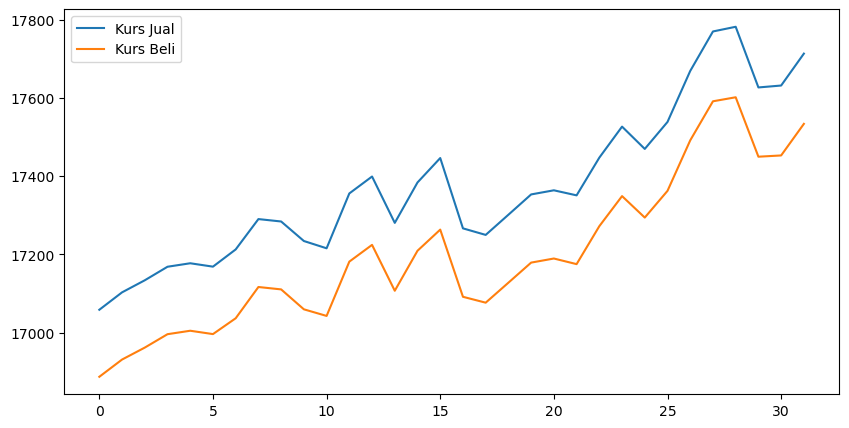

In [7]:
# data visualization
df[['Kurs Jual', 'Kurs Beli']].plot(figsize=(10, 5))
plt.show()

C:\Users\THINKPAD X1 CAROBON\AppData\Local\Temp\ipykernel_7688\705045601.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Jual.index = pd.to_datetime(df_Jual.index)  # Assuming the index still contains date strings
C:\Users\THINKPAD X1 CAROBON\AppData\Local\Temp\ipykernel_7688\705045601.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Beli.index = pd.to_datetime(df_Beli.index)  # Assuming the index still contains date strings
C:\Users\THINKPAD X1 CAROBON\AppData\Local\Temp\ipykernel_7688\705045601.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_Jual['Kurs Jual'] = df_Jual['Kurs Jual'].fillna(method='ffil

<Figure size 640x480 with 0 Axes>

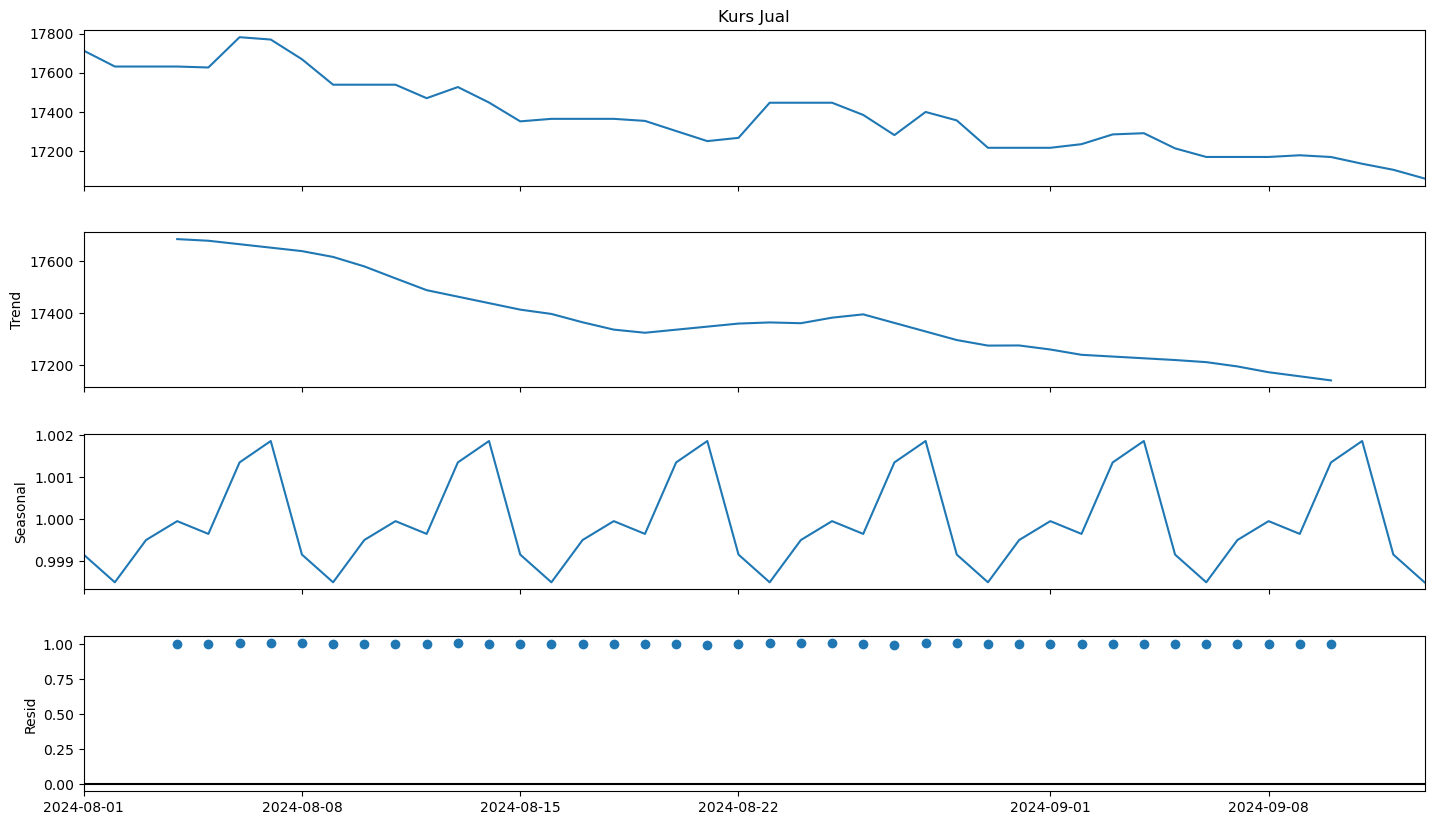

<Figure size 640x480 with 0 Axes>

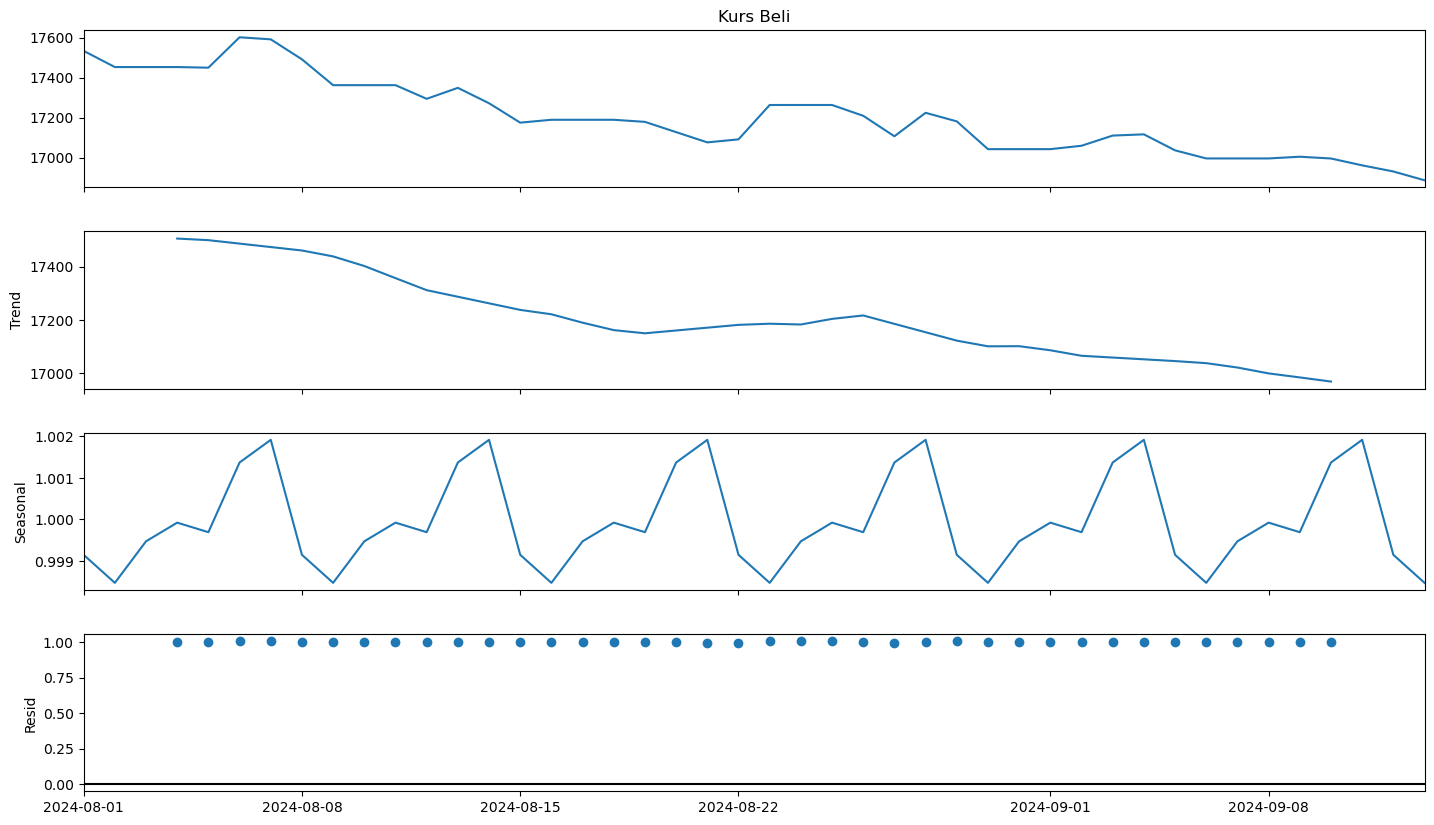

In [8]:
# handling missing value with mean
df_Jual['Kurs Jual'] = df_Jual['Kurs Jual'].fillna(df_Jual['Kurs Jual'].mean())
df_Beli['Kurs Beli'] = df_Beli['Kurs Beli'].fillna(df_Beli['Kurs Beli'].mean())

# Convert the index to DatetimeIndex and infer the frequency
df_Jual.index = pd.to_datetime(df_Jual.index)  
df_Jual = df_Jual.asfreq(pd.infer_freq(df_Jual.index)) # Infering the frequency for time series of Kurs Jual

df_Beli.index = pd.to_datetime(df_Beli.index)  
df_Beli = df_Beli.asfreq(pd.infer_freq(df_Beli.index)) # Infering the frequency for time series of Kurs Beli

# Check and handle any remaining missing values after frequency inference
df_Jual['Kurs Jual'] = df_Jual['Kurs Jual'].fillna(method='ffill')
df_Beli['Kurs Beli'] = df_Beli['Kurs Beli'].fillna(method='ffill')

# decompose the components from the time series.
result_jual = seasonal_decompose(df_Jual['Kurs Jual'], model='multiplicative')
fig_jual = plt.figure()
fig_jual = result_jual.plot()
fig_jual.set_size_inches(16, 9)
plt.show()

result_beli = seasonal_decompose(df_Beli['Kurs Beli'], model='multiplicative')
fig_beli = plt.figure()
fig_beli = result_beli.plot()
fig_beli.set_size_inches(16, 9)
plt.show()


# Stasionary

In [9]:
# create function to check stationarity
def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [34]:
# check stationarity of the dataset for Kurs Jual
print("Stationarity Kurs Jual")
check_stationarity(df_Jual['Kurs Jual'])

print("----------------------------")

# check stationarity of the dataset for Kurs Beli
print("Stationarity Kurs Beli")
check_stationarity(df_Beli['Kurs Beli'])

Stationarity Kurs Jual
ADF Statistic: -0.869590
p-value: 0.797822
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613
Non-stationary
----------------------------
Stationarity Kurs Beli
ADF Statistic: -0.870672
p-value: 0.797477
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613
Non-stationary


In [35]:
# perform first order differencing For Kurs Jual
diff1_Jual = df_Jual.diff().dropna()

print("Stationarity Kurs Jual")
check_stationarity(diff1_Jual['Kurs Jual'])

print("----------------------------")

# perform first order differencing For Kurs Beli
diff1_Beli = df_Beli.diff().dropna()

print("Stationarity Kurs Beli")
check_stationarity(diff1_Beli['Kurs Beli'])

Stationarity Kurs Jual
ADF Statistic: -2.972165
p-value: 0.037577
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613
Stationary
----------------------------
Stationarity Kurs Beli
ADF Statistic: -2.960643
p-value: 0.038737
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613
Stationary


# Modeling

In [36]:
# splitting dataset Kurs Jual
train_Jual = df_Jual[:35]
test_Jual = df_Jual[35:]

print('Train Harga Jual size : ', train_Jual.shape)
print('Test Harga Jual size : ', test_Jual.shape)

print("----------------------------")

# splitting dataset Kurs Beli
train_Beli = df_Beli[:35]
test_Beli = df_Beli[35:]

print('Train Harga Beli size : ', train_Beli.shape)
print('Test Harga Beli size : ', test_Beli.shape)

Train Harga Jual size :  (35, 1)
Test Harga Jual size :  (9, 1)
----------------------------
Train Harga Beli size :  (35, 1)
Test Harga Beli size :  (9, 1)


In [13]:
# create ARIMA function to find best model
def find_best_model(train, num_p, num_d, num_q):
  df = pd.DataFrame()
  # default value
  pdq = [[],[],[]]
  aic = []
  for p in range(num_p + 1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
    for d in range(num_d + 1):
      for q in range(num_q + 1):
        try: #Using exception to avoid the error while training the model with certain p and q value
          model = ARIMA(train, order=(p, d, q))
          result = model.fit()
          pdq[0].append(p)
          pdq[1].append(d)
          pdq[2].append(q)
          aic.append(result.aic)
        except:
          pass #If there is an error caused by the calculation, it will be skipped to the next iteration

  df['p'] = pdq[0]
  df['d'] = pdq[1]
  df['q'] = pdq[2]
  df['AIC'] = aic

  df.sort_values('AIC', inplace=True)

  return df.p.iloc[0], df.d.iloc[0], df.q.iloc[0], df.AIC.iloc[0], df



In [14]:
# find best model of ARIMA with combinations of p=4, d=4, q=4
find_best_model(train_Jual, 4, 4, 4)

c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users

(0,
 2,
 3,
 379.45878827973,
     p  d  q         AIC
 13  0  2  3  379.458788
 43  1  3  3  379.956068
 37  1  2  2  380.229857
 38  1  2  3  380.893850
 19  0  3  4  380.947940
 .. .. .. ..         ...
 2   0  0  2  419.602031
 1   0  0  1  425.697245
 45  1  4  0  429.521988
 20  0  4  0  439.730695
 0   0  0  0  459.919045
 
 [125 rows x 4 columns])

In [15]:
find_best_model(train_Beli, 4, 4, 4)

c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users

(0,
 2,
 3,
 377.3844114551901,
     p  d  q         AIC
 13  0  2  3  377.384411
 43  1  3  3  377.715984
 37  1  2  2  378.187362
 38  1  2  3  378.738716
 14  0  2  4  379.016524
 .. .. .. ..         ...
 2   0  0  2  417.863409
 1   0  0  1  424.357880
 45  1  4  0  428.350858
 20  0  4  0  438.506896
 0   0  0  0  459.094043
 
 [125 rows x 4 columns])

# Training and Evaluation with ARIMA

In [16]:
# train ARIMA of Kurs Jual with best combinations
arima_Jual = ARIMA(df_Jual, order=(0, 2, 3)).fit()
print('The AIC for kurs Jual is ', arima_Jual.aic)

# train ARIMA of Kurs Beli with best combination
arima_Beli = ARIMA(df_Beli, order=(0, 2, 3)).fit()
print('The AIC for kurs Beli is ', arima_Beli.aic)

The AIC for kurs Jual is  470.6624058441097
The AIC for kurs Beli is  468.2609574245254


In [18]:
# predict test-set for Kurs Jual
arima_pred_test_Jual = arima_Jual.predict(start="2024-09-05", end="2024-09-13", dynamic=True)
arima_pred_test_Jual = pd.DataFrame(arima_pred_test_Jual)
arima_pred_test_Jual.columns=['Kurs_Jual_predict']

act_vs_pred_arima_Jual = pd.concat([test_Jual, arima_pred_test_Jual], axis=1)
act_vs_pred_arima_Jual

,Kurs Jual,Kurs_Jual_predict
Tanggal,,
2024-09-05,17212.93,17256.855968
2024-09-06,17168.94,17226.337885
2024-09-07,17168.94,17214.109448
2024-09-08,17168.94,17201.881011
2024-09-09,17177.59,17189.652573
2024-09-10,17168.69,17177.424136
2024-09-11,17134.10,17165.195699
2024-09-12,17103.26,17152.967261
2024-09-13,17058.76,17140.738824


In [41]:
# Export Kurs Jual Euro to CSV
act_vs_pred_arima_Jual.to_csv("Prediction_Kurs_Jual.csv", index=True)

In [19]:
# predict test-set for Kurs Beli
arima_pred_test_Beli = arima_Beli.predict(start="2024-09-05", end="2024-09-13", dynamic=True)
arima_pred_test_Beli = pd.DataFrame(arima_pred_test_Beli)
arima_pred_test_Beli.columns=['Kurs_Beli_predict']

act_vs_pred_arima_Beli = pd.concat([test_Beli, arima_pred_test_Beli], axis=1)
act_vs_pred_arima_Beli

,Kurs Beli,Kurs_Beli_predict
Tanggal,,
2024-09-05,17037.03,17082.294207
2024-09-06,16996.58,17052.298456
2024-09-07,16996.58,17040.163412
2024-09-08,16996.58,17028.028368
2024-09-09,17005.14,17015.893324
2024-09-10,16996.32,17003.758279
2024-09-11,16962.07,16991.623235
2024-09-12,16931.53,16979.488191
2024-09-13,16887.50,16967.353146


In [42]:
# Export Kurs Beli Euro to CSV
act_vs_pred_arima_Beli.to_csv("Prediction_Kurs_Beli.csv", index=True)

In [20]:
# check the MAE for Kurs Jual and Beli
print('MAE test of Jual  : ', mean_absolute_error(test_Jual, arima_pred_test_Jual))
print('MAE test of Beli  : ', mean_absolute_error(test_Beli, arima_pred_test_Beli))

MAE test of Jual  :  40.33475623242298
MAE test of Beli  :  39.06340208318579


# Training and Evaluation with SARIMAX

In [21]:
# train SARIMAX with best combinations
sarimax_Jual = SARIMAX(df_Jual, order=(0, 2, 3),seasonal_order=(0, 2, 3, 9)).fit()
sarimax_Beli = SARIMAX(df_Beli, order=(0, 2, 3),seasonal_order=(0, 2, 3, 9)).fit()

c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\THINKPAD X1 CAROBON\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization faile

In [23]:
# predict test-set for Kurs Jual
sar_pred_test_Jual = sarimax_Jual.predict(start="2024-09-05", end="2024-09-13", dynamic=True)
sar_pred_test_Jual = pd.DataFrame(sar_pred_test_Jual)
sar_pred_test_Jual.columns = ['Kurs_Jual_predict']

# concate with actual test-set 
act_vs_pred_sar_Jual = pd.concat([test_Jual, sar_pred_test_Jual], axis=1)
act_vs_pred_sar_Jual


,Kurs Jual,Kurs_Jual_predict
Tanggal,,
2024-09-05,17212.93,17231.408948
2024-09-06,17168.94,17261.856494
2024-09-07,17168.94,17261.217400
2024-09-08,17168.94,17120.698978
2024-09-09,17177.59,17157.172779
2024-09-10,17168.69,17268.636350
2024-09-11,17134.10,17233.776998
2024-09-12,17103.26,17317.632995
2024-09-13,17058.76,17397.450538


In [24]:
# predict test-set for Kurs Beli
sar_pred_test_Beli = sarimax_Beli.predict(start="2024-09-05", end="2024-09-13", dynamic=True)
sar_pred_test_Beli = pd.DataFrame(sar_pred_test_Beli)
sar_pred_test_Beli.columns = ['Kurs_Beli_predict']

# concate with actual test-set
act_vs_pred_sar_Beli = pd.concat([test_Beli, sar_pred_test_Beli], axis=1)
act_vs_pred_sar_Beli

,Kurs Beli,Kurs_Beli_predict
Tanggal,,
2024-09-05,17037.03,17062.872157
2024-09-06,16996.58,17097.042149
2024-09-07,16996.58,17094.289500
2024-09-08,16996.58,16956.122414
2024-09-09,17005.14,16989.966185
2024-09-10,16996.32,17102.845874
2024-09-11,16962.07,17068.233767
2024-09-12,16931.53,17149.914468
2024-09-13,16887.50,17232.210216


In [25]:
# check the MAE for Kurs Jual and Beli
print('MAE test of Jual : ', mean_absolute_error(test_Jual, sar_pred_test_Jual))
print('MAE test of Beli : ', mean_absolute_error(test_Beli, sar_pred_test_Beli))

MAE test of Jual :  113.8908853154923
MAE test of Beli :  117.26994798239684


# Inference

inference using ARIMA, because it has lower MAE.

In [26]:
# forecasting for Kurs Jual
forecast_Jual = arima_Jual.forecast(steps=12) #forecast periods

# get confidence intervals for Kurs Jual
forecast_results_Jual = arima_Jual.get_forecast(steps=12)
conf_int_Jual = forecast_results_Jual.conf_int(alpha=0.05)

# make as pandas series
forecast_series_Jual = pd.Series(forecast_Jual, index=test_Jual.index)
lower_series_Jual = pd.Series(conf_int_Jual.iloc[:, 0], index=test_Jual.index)
upper_series_Jual = pd.Series(conf_int_Jual.iloc[:, 1], index=test_Jual.index)

#-----------------------------------------------------------------------------#

# forecasting for Kurs Beli
forecast_Beli = arima_Beli.forecast(steps=12) #forecast periods

# get confidence intervals for Kurs Beli
forecast_results_Beli = arima_Beli.get_forecast(steps=12)
conf_int_Beli = forecast_results_Beli.conf_int(alpha=0.05)

# make as pandas series
forecast_series_Beli = pd.Series(forecast_Beli, index=test_Beli.index)
lower_series_Beli = pd.Series(conf_int_Beli.iloc[:, 0], index=test_Beli.index)
upper_series_Beli = pd.Series(conf_int_Beli.iloc[:, 1], index=test_Beli.index)

In [39]:
# predict the Kurs Jual for September, 20 2024
forecast_Jual['2024-09-20':]

2024-09-20    16986.498564
2024-09-21    16972.838703
2024-09-22    16959.178843
2024-09-23    16945.518982
2024-09-24    16931.859121
2024-09-25    16918.199260
Freq: D, Name: predicted_mean, dtype: float64

In [38]:
# predict the Kurs Jual for September, 20 2024
forecast_Beli['2024-09-20':]

2024-09-20    16815.367106
2024-09-21    16801.832167
2024-09-22    16788.297229
2024-09-23    16774.762291
2024-09-24    16761.227352
2024-09-25    16747.692414
Freq: D, Name: predicted_mean, dtype: float64

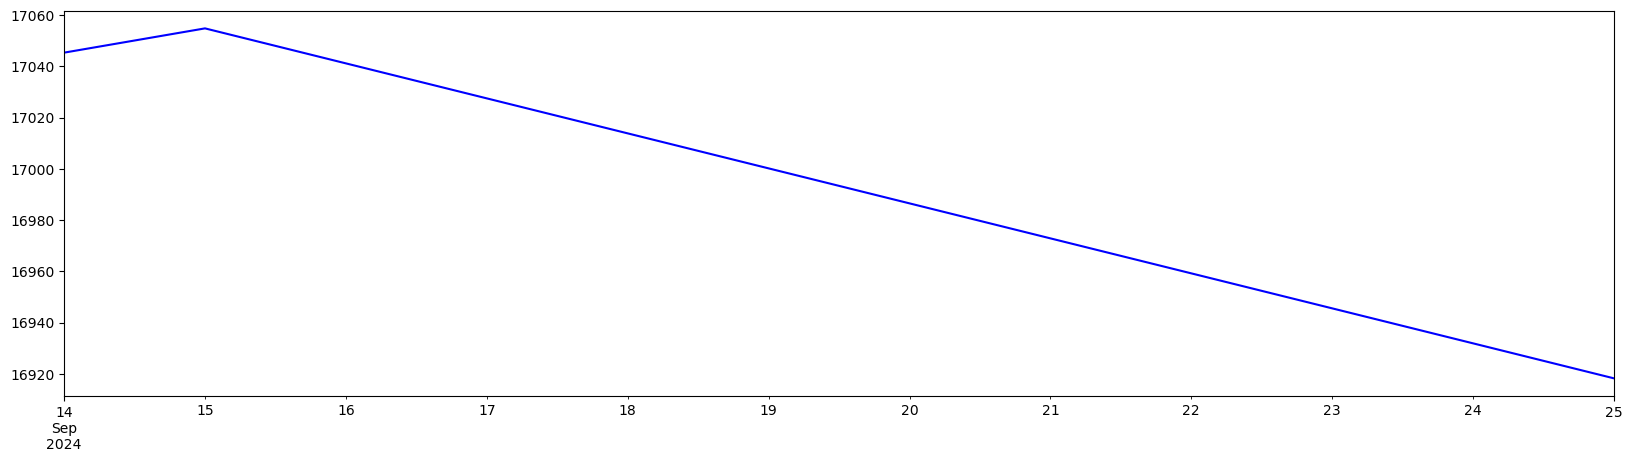

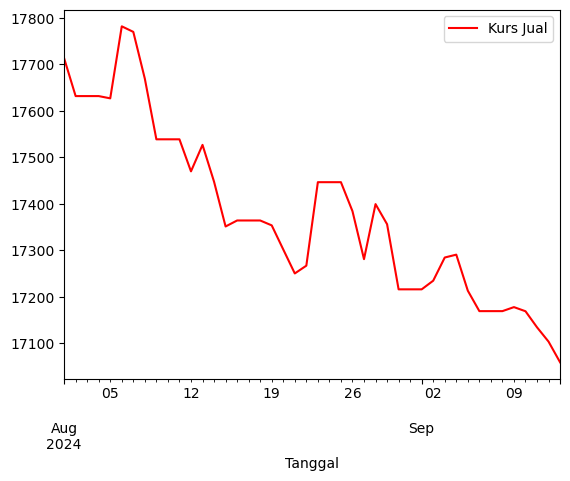

In [29]:
# forecast trend for Kurs Jual
forecast_Jual.plot(color='blue', label = 'forecast',figsize=(20,5))
df_Jual.plot(color='red',label = 'real')
plt.legend()

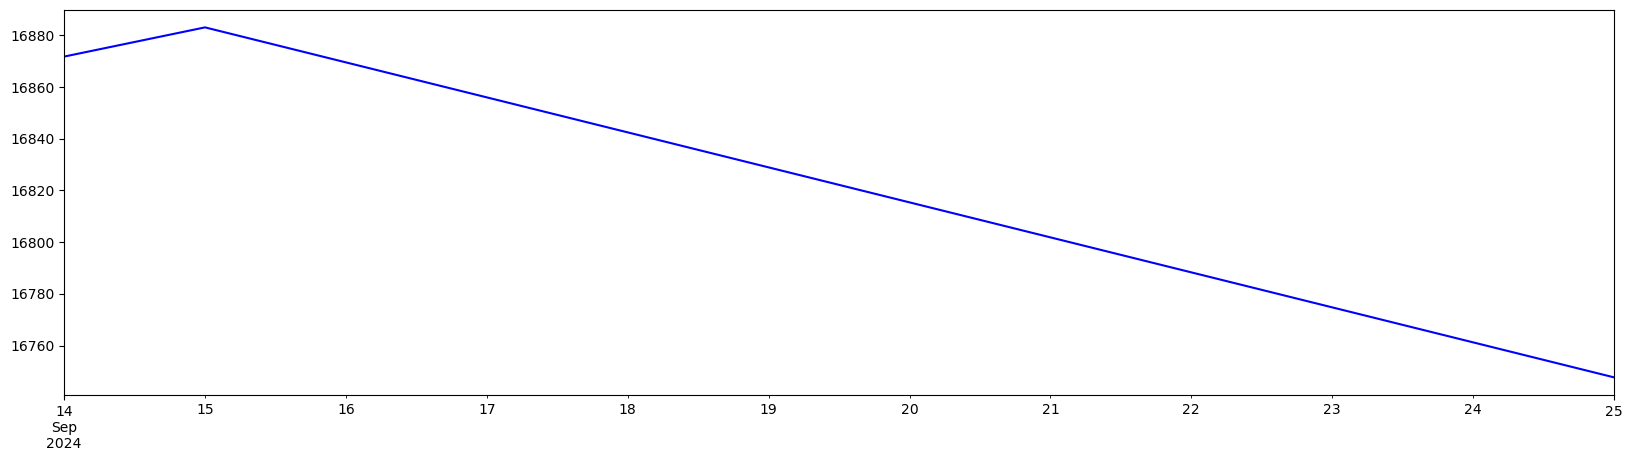

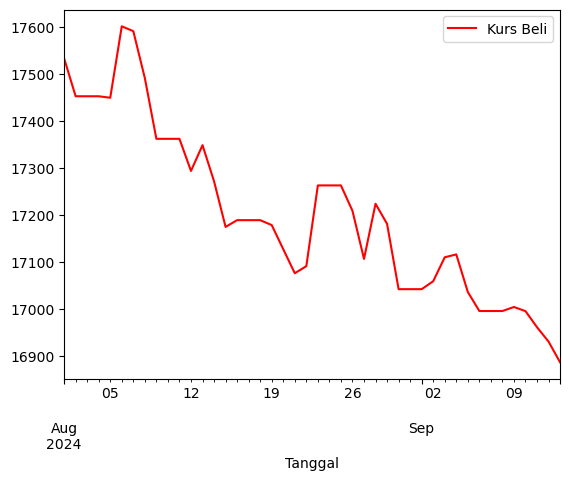

In [30]:
# forecast trend for Kurs Beli
forecast_Beli.plot(color='blue', label = 'forecast',figsize=(20,5))
df_Beli.plot(color='red',label = 'real')
plt.legend()

In [48]:
# make the forecast of Kurs Jual into a dataframe
df_forecast_Jual = pd.DataFrame(forecast_Jual)
df_forecast_Jual

# Export Prediction Kurs Jual Euro to CSV
df_forecast_Jual.to_csv("Prediction_Kurs_Jual_Future.csv", index=True)

In [49]:
# make the forecast of Kurs Beli into a dataframe
df_forecast_Beli = pd.DataFrame(forecast_Beli)
df_forecast_Beli

# Export Prediction Kurs Beli Euro to CSV
df_forecast_Beli.to_csv("Prediction_Kurs_Beli_Future.csv", index=True)